In [73]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler

pd.set_option('display.max_columns', None)

In [74]:
psd_gamma =  pd.read_csv("psd_gamma_dataset.csv")
psd_alpha =  pd.read_csv("psd_alpha_dataset.csv")
psd_beta = pd.read_csv("psd_beta_dataset.csv")
psd_theta =  pd.read_csv("psd_theta_dataset.csv")
psd_delta = pd.read_csv("psd_delta_dataset.csv")
psd_all_bands  =  pd.read_csv("psd_combined_dataset.csv")

In [98]:
df =psd_all_bands
df.shape

(2625, 71)

In [76]:
df.head()

,AF3_delta,AF3_theta,AF3_alpha,AF3_beta,AF3_gamma,F7_delta,F7_theta,F7_alpha,F7_beta,F7_gamma,F3_delta,F3_theta,F3_alpha,F3_beta,F3_gamma,FC5_delta,FC5_theta,FC5_alpha,FC5_beta,FC5_gamma,T7_delta,T7_theta,T7_alpha,T7_beta,T7_gamma,P7_delta,P7_theta,P7_alpha,P7_beta,P7_gamma,O1_delta,O1_theta,O1_alpha,O1_beta,O1_gamma,O2_delta,O2_theta,O2_alpha,O2_beta,O2_gamma,P8_delta,P8_theta,P8_alpha,P8_beta,P8_gamma,T8_delta,T8_theta,T8_alpha,T8_beta,T8_gamma,FC6_delta,FC6_theta,FC6_alpha,FC6_beta,FC6_gamma,F4_delta,F4_theta,F4_alpha,F4_beta,F4_gamma,F8_delta,F8_theta,F8_alpha,F8_beta,F8_gamma,AF4_delta,AF4_theta,AF4_alpha,AF4_beta,AF4_gamma,Class
0,9.781298e-13,3.359950e-13,3.188894e-12,1.245718e-13,8.134620e-14,1.735391e-12,8.993291e-13,1.242525e-12,1.451916e-13,1.445955e-13,4.999214e-12,1.154212e-12,9.138604e-12,8.796575e-13,4.331373e-13,2.355129e-12,4.207628e-13,6.766016e-13,2.592974e-13,1.743250e-13,1.994857e-12,3.262762e-13,1.111227e-12,4.610164e-13,3.595411e-13,8.321739e-13,1.784946e-13,1.818409e-12,6.533799e-13,6.699019e-13,1.337121e-12,3.973356e-13,8.338239e-12,4.067710e-13,1.847092e-13,5.240251e-12,1.674346e-12,3.723607e-11,8.538310e-13,2.949328e-13,7.734512e-12,1.540031e-12,1.853294e-11,1.847511e-12,1.098954e-12,1.741085e-12,3.332919e-13,9.397090e-13,3.784087e-13,4.168692e-13,7.481135e-13,2.337065e-13,5.220400e-13,9.789828e-14,6.330620e-14,2.039460e-12,1.860227e-13,7.324245e-13,3.004944e-13,3.389559e-13,2.544219e-11,8.175958e-12,6.129035e-12,9.997035e-13,8.854183e-13,2.451142e-12,4.902874e-13,7.788334e-12,6.253315e-13,2.747257e-13,Apple
1,2.186696e-12,8.217624e-13,9.343430e-13,1.763305e-13,1.503774e-13,2.350064e-12,4.817957e-13,8.204148e-13,1.733843e-13,2.355968e-13,5.134002e-12,3.309554e-12,2.086920e-12,5.313989e-13,4.262586e-13,1.394327e-12,7.860482e-13,1.629336e-12,2.211739e-13,1.920222e-13,1.352253e-12,7.881063e-13,1.567052e-12,3.332271e-13,4.007483e-13,1.469101e-12,6.608882e-13,2.373554e-12,4.711036e-13,2.819496e-13,1.749619e-12,1.991385e-13,6.861677e-12,4.542134e-13,1.385703e-13,4.621871e-12,9.065502e-13,1.859847e-11,4.540559e-13,2.105624e-13,5.790260e-12,1.745585e-12,8.948453e-12,2.073528e-12,2.324821e-12,1.196430e-12,9.036701e-13,1.536470e-12,2.547728e-13,3.526978e-13,2.913501e-13,3.110284e-13,3.674362e-13,1.486392e-13,8.688918e-14,3.326207e-12,3.678485e-13,1.083399e-12,2.332213e-13,3.630734e-13,3.209420e-11,1.639293e-11,1.322766e-11,1.408840e-12,9.615718e-13,2.740624e-12,2.033171e-12,2.712456e-12,4.846691e-13,2.099651e-13,Apple
2,1.831541e-12,4.621903e-13,4.939904e-13,1.365497e-13,1.216245e-13,1.827288e-12,2.909212e-13,3.313684e-13,1.712270e-13,2.330484e-13,5.023025e-12,2.427280e-12,1.725414e-12,8.366049e-13,3.578463e-13,2.569595e-12,6.918740e-13,7.233807e-13,4.006257e-13,1.751532e-13,5.061233e-12,1.081894e-12,1.177956e-12,4.988615e-13,2.474063e-13,3.465587e-12,1.246342e-12,1.117451e-12,7.751897e-13,6.497030e-13,3.877241e-12,8.262552e-13,1.345910e-12,3.632720e-13,2.417174e-13,1.685476e-12,8.036039e-13,1.143576e-12,6.210471e-13,2.860905e-13,2.256121e-12,1.766179e-12,2.563366e-12,1.740289e-12,1.729534e-12,4.608765e-12,7.274866e-13,8.868908e-13,4.802600e-13,1.784708e-13,3.301137e-13,3.317815e-13,7.928056e-14,1.253414e-13,8.387138e-14,1.741973e-12,4.461130e-13,5.753676e-13,3.320333e-13,2.449769e-13,2.450466e-11,5.744617e-12,3.248297e-12,5.510670e-13,3.833949e-13,1.139835e-11,3.778250e-12,2.333509e-12,7.535085e-13,2.621146e-13,Apple
3,6.830632e-12,1.248830e-12,6.328854e-13,1.380709e-13,1.752919e-13,8.362795e-13,5.103944e-13,3.452318e-13,1.704885e-13,7.818362e-14,1.411182e-11,3.158596e-12,1.963638e-12,4.743033e-13,7.507774e-13,4.879873e-12,6.694028e-13,1.057726e-12,1.962553e-13,1.833836e-13,9.851251e-12,7.181785e-13,2.160400e-12,4.801060e-13,4.861647e-13,2.328473e-12,1.201442e-12,1.126470e-12,3.998983e-13,5.354177e-13,2.007665e-12,6.825495e-13,2.555787e-12,2.167810e-13,2.144245e-13,2.966700e-12,7.455879e-13,2.029456e-12,3.839970e-13,2.514688e-13,7.316339e-12,7.024675e-13,5.145030e-12,1.268121e-12,2.206385e-12,9.148907e-12,1.1

In [77]:
df.describe()

,AF3_delta,AF3_theta,AF3_alpha,AF3_beta,AF3_gamma,F7_delta,F7_theta,F7_alpha,F7_beta,F7_gamma,F3_delta,F3_theta,F3_alpha,F3_beta,F3_gamma,FC5_delta,FC5_theta,FC5_alpha,FC5_beta,FC5_gamma,T7_delta,T7_theta,T7_alpha,T7_beta,T7_gamma,P7_delta,P7_theta,P7_alpha,P7_beta,P7_gamma,O1_delta,O1_theta,O1_alpha,O1_beta,O1_gamma,O2_delta,O2_theta,O2_alpha,O2_beta,O2_gamma,P8_delta,P8_theta,P8_alpha,P8_beta,P8_gamma,T8_delta,T8_theta,T8_alpha,T8_beta,T8_gamma,FC6_delta,FC6_theta,FC6_alpha,FC6_beta,FC6_gamma,F4_delta,F4_theta,F4_alpha,F4_beta,F4_gamma,F8_delta,F8_theta,F8_alpha,F8_beta,F8_gamma,AF4_delta,AF4_theta,AF4_alpha,AF4_beta,AF4_gamma
count,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03,2.625000e+03
mean,1.584949e-10,3.108119e-11,1.444698e-11,2.719947e-12,5.595984e-13,1.673400e-10,2.455631e-11,1.084416e-11,2.740199e-12,9.151773e-13,9.388052e-10,3.950115e-10,1.266218e-10,3.181611e-11,4.801455e-12,3.736330e-10,8.791859e-11,3.704482e-11,7.889986e-12,2.021149e-12,7.130340e-10,3.177469e-10,1.067782e-10,2.779343e-11,3.099317e-12,7.095957e-10,3.161152e-10,1.067278e-10,2.727685e-11,2.947654e-12,9.100960e-10,4.126445e-10,1.438248e-10,3.306164e-11,3.243341e-12,1.158269e-09,5.342514e-10,1.948235e-10,4.182430e-11,3.863897e-12,1.636413e-09,3.304722e-10,1.109491e-10,2.785437e-11,3.118985e-12,6.933638e-10,3.077742e-10,1.029789e-10,2.653817e-11,2.814169e-12,9.191544e-11,6.208732e-12,4.147026e-12,1.096560e-12,5.512128e-13,5.891373e-09,6.863172e-10,2.376212e-10,5.217654e-11,8.933915e-12,5.432256e-10,1.858935e-10,6.921911e-11,2.015946e-11,4.914580e-12,1.757902e-10,6.844391e-11,2.958239e-11,8.184722e-12,1.660867e-12
std,1.259073e-09,1.567605e-10,4.982294e-11,1.114813e-11,1.776281e-12,1.076551e-09,1.271924e-10,4.474473e-11,1.435863e-11,4.865531e-12,6.271714e-09,2.395956e-09,6.798354e-10,1.729334e-10,3.320715e-11,3.733342e-09,1.242530e-09,6.705010e-10,7.545641e-11,1.864567e-11,5.357339e-09,1.983448e-09,6.184403e-10,1.655859e-10,1.656025e-11,5.354308e-09,1.973606e-09,6.114620e-10,1.634826e-10,1.631658e-11,6.757716e-09,2.612397e-09,7.640812e-10,1.945725e-10,1.810210e-11,8.641499e-09,3.360141e-09,9.817013e-10,2.437025e-10,2.211290e-11,3.243806e-08,2.107947e-09,6.561618e-10,1.672657e-10,1.916474e-11,5.243773e-09,1.920993e-09,5.966588e-10,1.591913e-10,1.581903e-11,9.443845e-10,2.805081e-11,1.359767e-11,6.090301e-12,1.956514e-12,4.384592e-08,2.793121e-09,9.708447e-10,2.197205e-10,4.083726e-11,3.414249e-09,1.081652e-09,3.550901e-10,1.118656e-10,4.715749e-11,1.191002e-09,4.158703e-10,1.524374e-10,5.128014e-11,1.621407e-11
min,2.175829e-13,4.036837e-14,2.989425e-14,4.909331e-14,4.137640e-14,1.677623e-13,4.580646e-14,3.477908e-14,6.794699e-14,4.301239e-14,1.986921e-13,5.796365e-14,5.072770e-14,4.805997e-14,2.846771e-14,2.059234e-13,3.255454e-14,3.798638e-14,5.798166e-14,3.581942e-14,4.074054e-13,8.768140e-14,1.540543e-13,1.179532e-13,6.216827e-14,2.168043e-13,5.588364e-14,6.057598e-14,7.894651e-14,5.111086e-14,1.658149e-13,4.716692e-14,6.040793e-14,6.194869e-14,5.200166e-14,2.832075e-13,8.930179e-14,6.331089e-14,8.230329e-14,3.766271e-14,2.858599e-13,3.322738e-14,4.129323e-14,4.670250e-14,5.297006e-14,3.081464e-13,6.263604e-14,7.3

<Axes: ylabel='Density'>

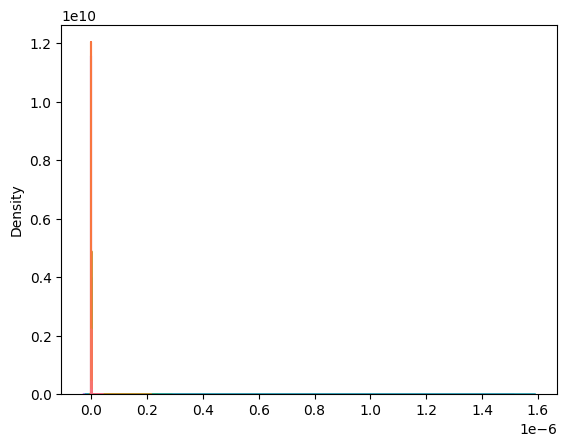

In [78]:
sns.kdeplot(df.drop(["Class"],axis=1),legend=False)

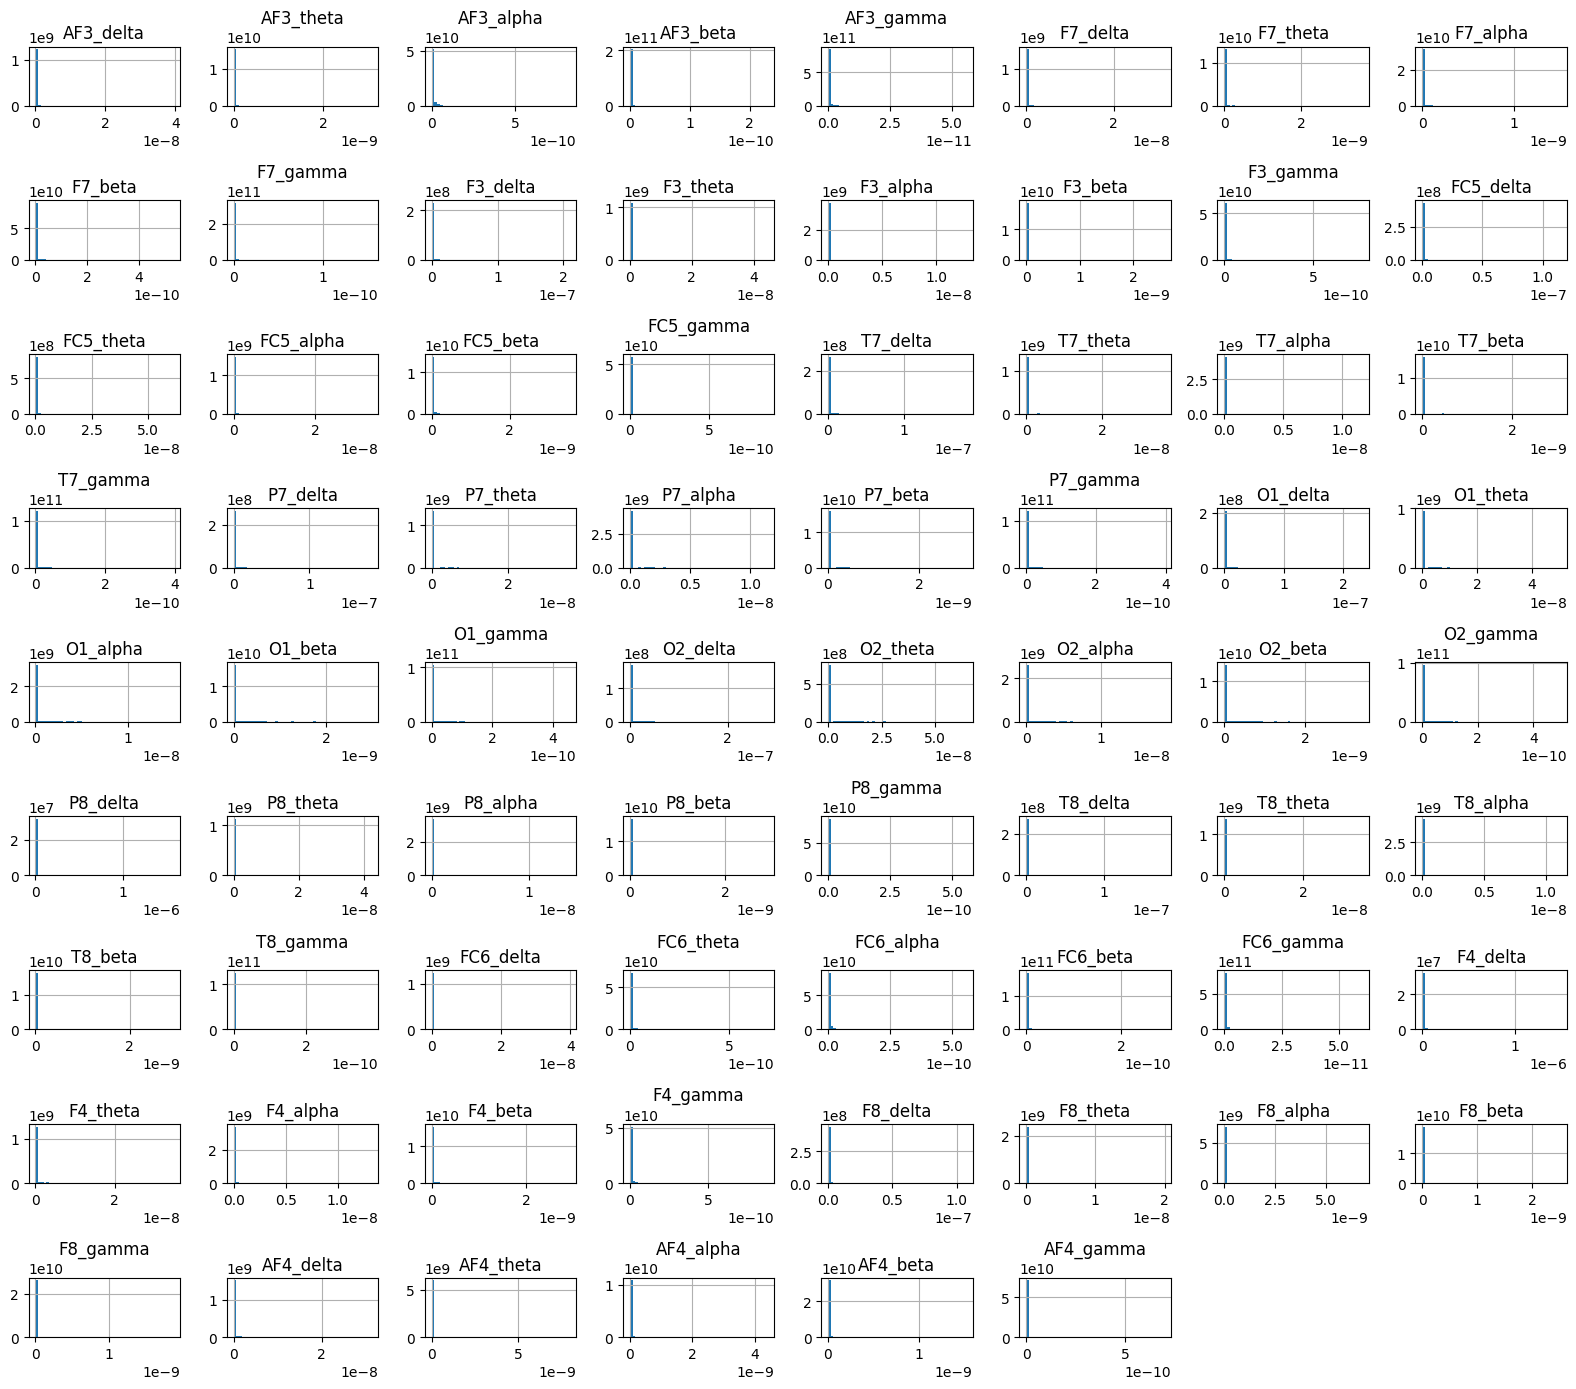

In [96]:
df.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

**Data Preprocessing**


Data scaling - https://mkang32.github.io/python/2020/12/27/feature-scaling.html 


feature engineering - https://github.com/mkang32/feature-engineering

**Minmax**

,AF3_delta,AF3_theta,AF3_alpha,AF3_beta,AF3_gamma,F7_delta,F7_theta,F7_alpha,F7_beta,F7_gamma,F3_delta,F3_theta,F3_alpha,F3_beta,F3_gamma,FC5_delta,FC5_theta,FC5_alpha,FC5_beta,FC5_gamma,T7_delta,T7_theta,T7_alpha,T7_beta,T7_gamma,P7_delta,P7_theta,P7_alpha,P7_beta,P7_gamma,O1_delta,O1_theta,O1_alpha,O1_beta,O1_gamma,O2_delta,O2_theta,O2_alpha,O2_beta,O2_gamma,P8_delta,P8_theta,P8_alpha,P8_beta,P8_gamma,T8_delta,T8_theta,T8_alpha,T8_beta,T8_gamma,FC6_delta,FC6_theta,FC6_alpha,FC6_beta,FC6_gamma,F4_delta,F4_theta,F4_alpha,F4_beta,F4_gamma,F8_delta,F8_theta,F8_alpha,F8_beta,F8_gamma,AF4_delta,AF4_theta,AF4_alpha,AF4_beta,AF4_gamma
count,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000
mean,0.004021,0.010113,0.017435,0.011624,0.009343,0.005321,0.006860,0.007185,0.005020,0.005649,0.004492,0.008881,0.009978,0.012362,0.006146,0.003260,0.001437,0.001097,0.002217,0.002290,0.003928,0.008770,0.009161,0.009047,0.007705,0.003906,0.008799,0.009315,0.009039,0.007335,0.003925,0.008208,0.009646,0.011067,0.007012,0.004118,0.008315,0.010645,0.012241,0.007715,0.001043,0.007809,0.007853,0.009612,0.005547,0.003914,0.008805,0.009210,0.009037,0.007307,0.002308,0.008894,0.007421,0.003571,0.008552,0.003966,0.019740,0.018005,0.017905,0.010065,0.005078,0.009342,0.010244,0.008020,0.002589,0.005618,0.008605,0.006706,0.005369,0.002331
std,0.031990,0.051070,0.060252,0.048520,0.032024,0.034263,0.035601,0.029743,0.026973,0.031512,0.030017,0.053875,0.053592,0.067295,0.042763,0.032590,0.020314,0.019878,0.021362,0.021506,0.029533,0.054757,0.053136,0.054127,0.042011,0.029479,0.054947,0.053396,0.054330,0.041321,0.029148,0.051972,0.051266,0.065252,0.039774,0.030728,0.052308,0.053656,0.071464,0.044590,0.020675,0.049815,0.046462,0.057816,0.034675,0.029617,0.054966,0.053401,0.054390,0.041667,0.023758,0.040512,0.024584,0.021015,0.032684,0.029517,0.080346,0.073581,0.075519,0.046277,0.031939,0.054388,0.052584,0.044694,0.025043,0.038087,0.052370,0.034648,0.033940,0.023363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000085,0.000189,0.000928,0.000779,0.001853,0.000133,0.000170,0.000525,0.000405,0.000989,0.000019,0.000015,0.000078,0.000091,0.000165,0.000027,0.000007,0.000015,0.000043,0.000137,0.000015,0.000019,0.000059,0.000102,0.000533,0.000014,0.000016,0.000062,0.000092,0.000427,0.000017,0.000013,0.000085,0.000134,0.000382,0.000018,0.000015,0.000162,0.000195,0.000525,0.000002,0.000013,0.000051,0.000087,0.000208,0.000016,0.000019,0.000062,0.000082,0.000393,0.000068,0.000723,0.000907,0.000871,0.002555,0.000002,0.000016,0.000047,0.000080,0.000196,0.000061,0.000048,0.000171,0.000131,0.000102,0.000092,0.000081,0.00019

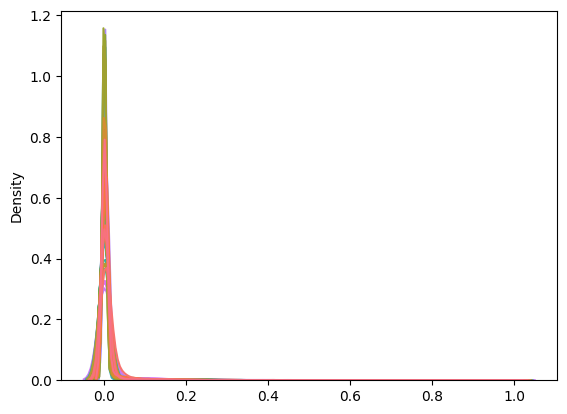

In [80]:
# Minmax 
scaler_minmax = MinMaxScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_minmax = scaler_minmax.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_minmax = pd.DataFrame(X_train_scaled_minmax, columns=df.drop(["Class"],axis=1).columns)

# plot
sns.kdeplot(X_train_scaled_minmax,legend=False)
X_train_scaled_minmax.describe()

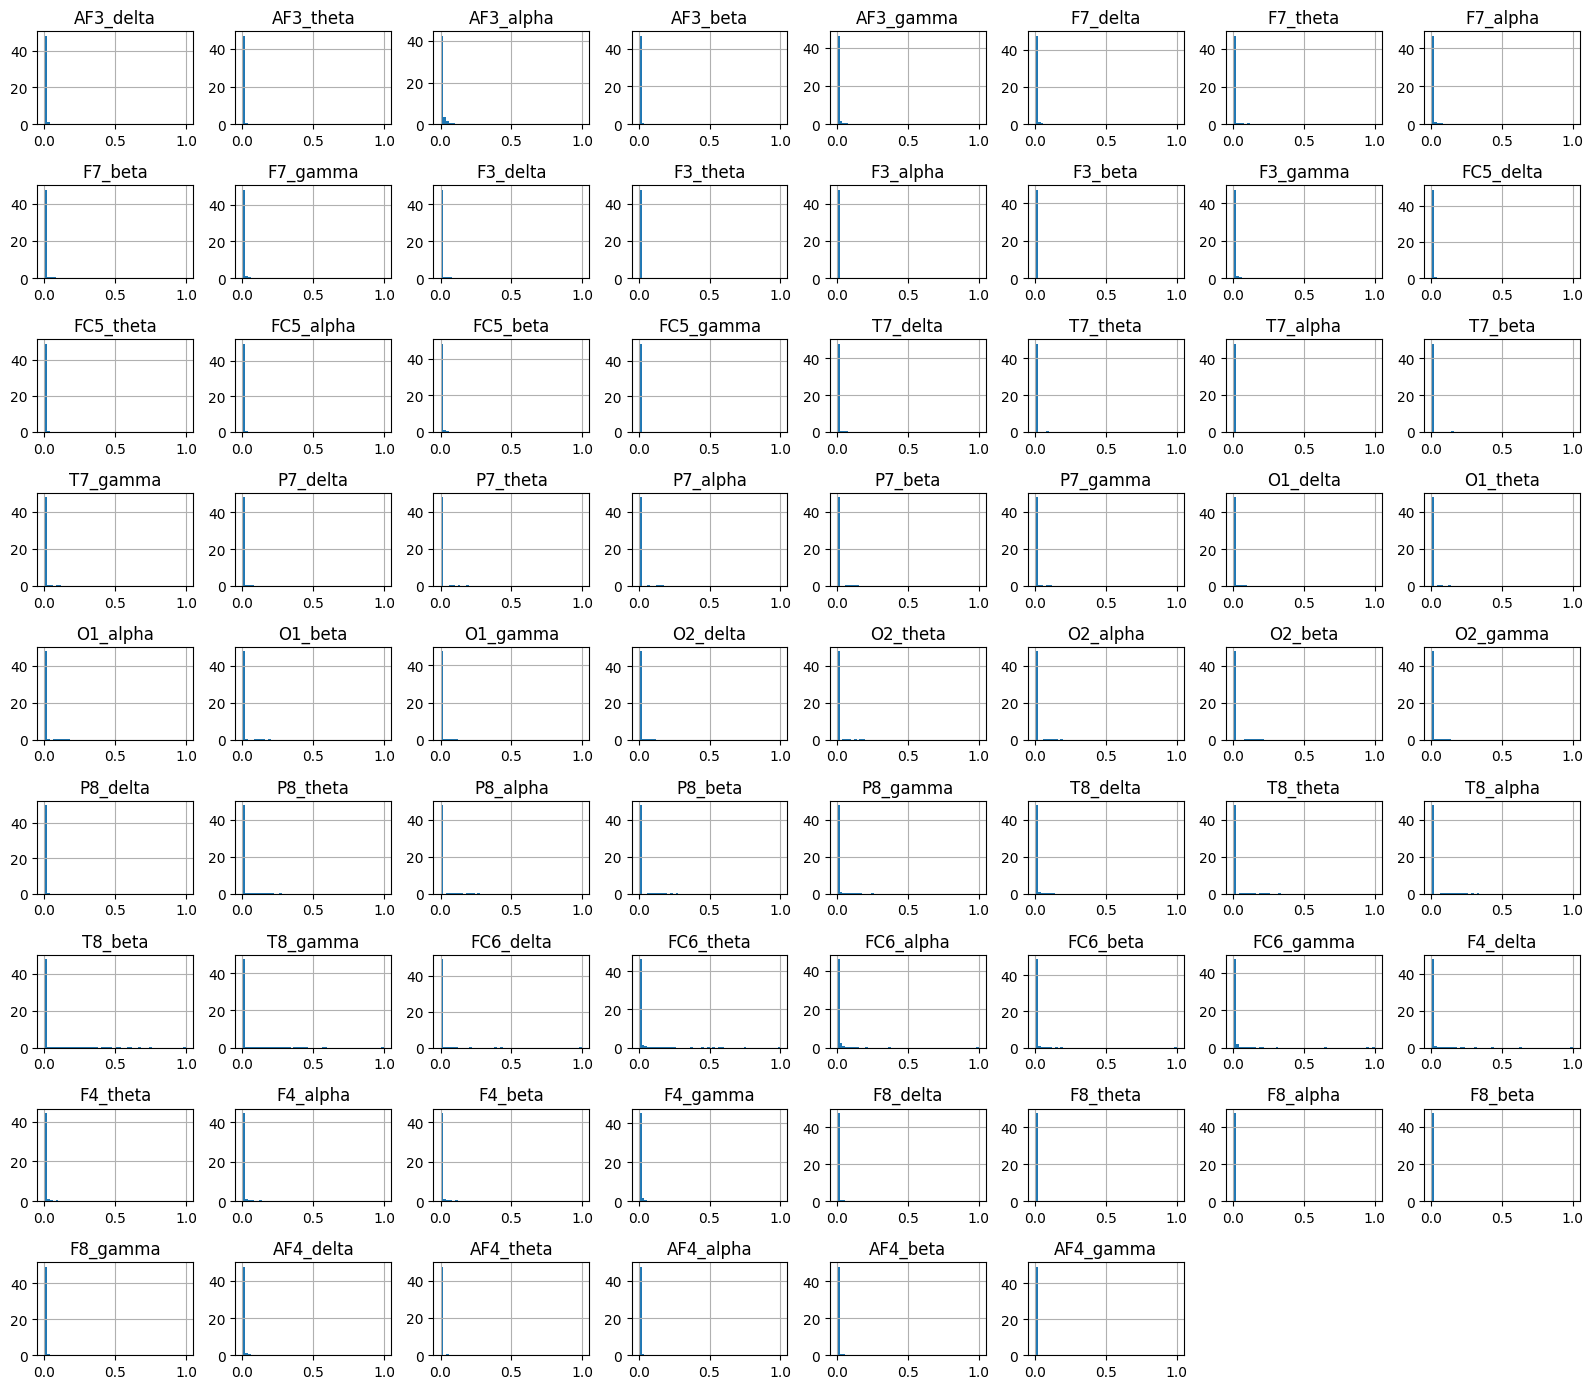

In [95]:
X_train_scaled_minmax.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

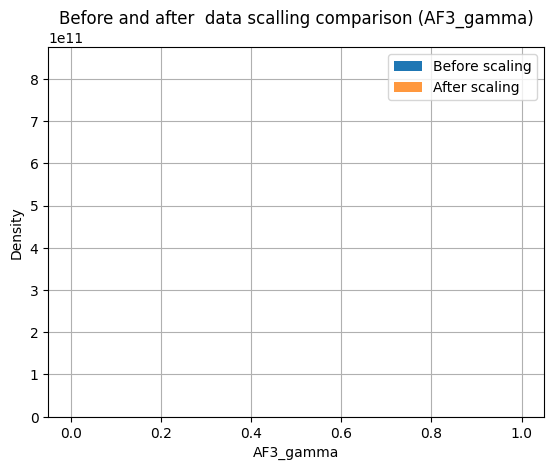

In [82]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_minmax['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

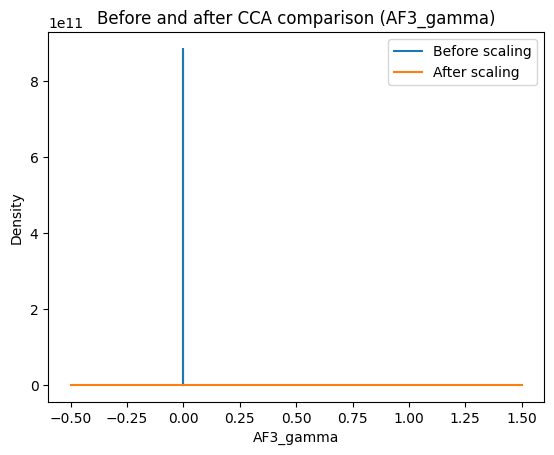

In [83]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_minmax['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

**MaxAbsScaler**

,AF3_delta,AF3_theta,AF3_alpha,AF3_beta,AF3_gamma,F7_delta,F7_theta,F7_alpha,F7_beta,F7_gamma,F3_delta,F3_theta,F3_alpha,F3_beta,F3_gamma,FC5_delta,FC5_theta,FC5_alpha,FC5_beta,FC5_gamma,T7_delta,T7_theta,T7_alpha,T7_beta,T7_gamma,P7_delta,P7_theta,P7_alpha,P7_beta,P7_gamma,O1_delta,O1_theta,O1_alpha,O1_beta,O1_gamma,O2_delta,O2_theta,O2_alpha,O2_beta,O2_gamma,P8_delta,P8_theta,P8_alpha,P8_beta,P8_gamma,T8_delta,T8_theta,T8_alpha,T8_beta,T8_gamma,FC6_delta,FC6_theta,FC6_alpha,FC6_beta,FC6_gamma,F4_delta,F4_theta,F4_alpha,F4_beta,F4_gamma,F8_delta,F8_theta,F8_alpha,F8_beta,F8_gamma,AF4_delta,AF4_theta,AF4_alpha,AF4_beta,AF4_gamma
count,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2.625000e+03,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2.625000e+03,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2.625000e+03,2.625000e+03,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2.625000e+03,2.625000e+03,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2.625000e+03,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000
mean,0.004027,0.010126,0.017470,0.011835,0.010081,0.005326,0.006873,0.007208,0.005147,0.005926,4.493265e-03,0.008882,0.009982,0.012381,0.006183,0.003262,1.437376e-03,0.001098,0.002234,0.002331,0.003931,0.008772,0.009174,0.009085,0.007861,0.003907,0.008801,0.009320,0.009065,0.007464,3.925465e-03,8.209256e-03,0.009650,0.011087,0.007125,0.004119,0.008317,0.010648,0.012264,0.007791,1.043002e-03,7.809697e-03,0.007856,0.009628,0.005643,0.003916,0.008806,0.009217,0.009067,0.007412,0.002312,0.008966,0.007497,0.003783,0.009202,3.966096e-03,0.019742,0.018009,0.017933,0.010123,0.005082,0.009347,0.010250,0.008054,0.002610,0.005622,0.008619,0.006724,0.005417,0.002393
std,0.031990,0.051070,0.060250,0.048510,0.032000,0.034263,0.035600,0.029742,0.026969,0.031504,3.001738e-02,0.053875,0.053591,0.067293,0.042762,0.032590,2.031406e-02,0.019878,0.021362,0.021505,0.029533,0.054757,0.053135,0.054125,0.042004,0.029479,0.054947,0.053396,0.054329,0.041316,2.914767e-02,5.197169e-02,0.051266,0.065250,0.039769,0.030728,0.052308,0.053656,0.071462,0.044587,2.067509e-02,4.981485e-02,0.046462,0.057815,0.034672,0.029617,0.054966,0.053401,0.054388,0.041663,0.023758,0.040509,0.024582,0.021010,0.032662,2.951725e-02,0.080345,0.073581,0.075517,0.046274,0.031939,0.054388,0.052584,0.044692,0.025042,0.038087,0.052369,0.034647,0.033938,0.023362
min,0.000006,0.000013,0.000036,0.000214,0.000745,0.000005,0.000013,0.000023,0.000128,0.000278,9.509709e-07,0.000001,0.000004,0.000019,0.000037,0.000002,5.322325e-07,0.000001,0.000016,0.000041,0.000002,0.000002,0.000013,0.000039,0.000158,0.000001,0.000002,0.000005,0.000026,0.000129,7.151999e-07,9.383507e-07,0.000004,0.000021,0.000114,0.000001,0.000001,0.000003,0.000024,0.000076,1.821989e-07,7.852273e-07,0.000003,0.000016,0.000096,0.000002,0.000002,0.000007,0.000030,0.000105,0.000004,0.000073,0.000077,0.000212,0.000656,1.333355e-07,0.000002,0.000005,0.000028,0.000059,0.000004,0.000005,0.000006,0.000034,0.000021,0.000004,0.000015,0.000018,0.000048,0.000062
25%,0.000090,0.000202,0.000964,0.000993,0.002597,0.000138,0.000182,0.000549,0.000533,0.001267,1.957589e-05,0.000017,0.000082,0.000110,0.000201,0.000028,7.369426e-06,0.000016,0.000060,0.000178,0.000018,0.000021,0.000072,0.000140,0.000690,0.000015,0.000018,0.000068,0.000118,0.000556,1.754164e-05,1.409149e-05,0.000089,0.000155,0.000496,0.000019,0.000017,0.000165,0.000220,0.000601,2.029435e-06,1.427551e-05,0.000054,0.000103,0.000304,0.000018,0.000021,0.000069,0.000112,0.000498,0.000072,0.000796,0.000984,0.001083,0.003209,

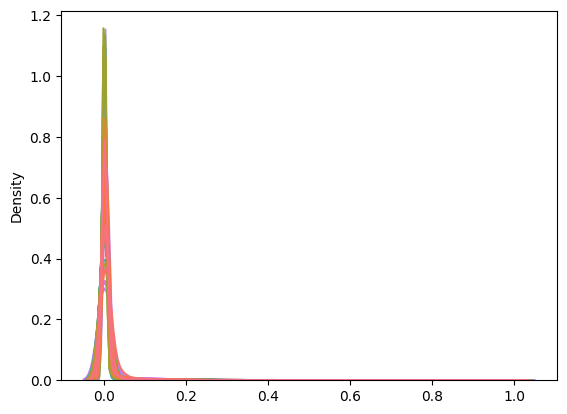

In [84]:
scaler_maxabs = MaxAbsScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_maxabs = scaler_maxabs.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_maxabs = pd.DataFrame(X_train_scaled_maxabs, columns=df.drop(["Class"],axis=1).columns)

# plot
sns.kdeplot(X_train_scaled_maxabs,legend=False)
X_train_scaled_maxabs.describe()


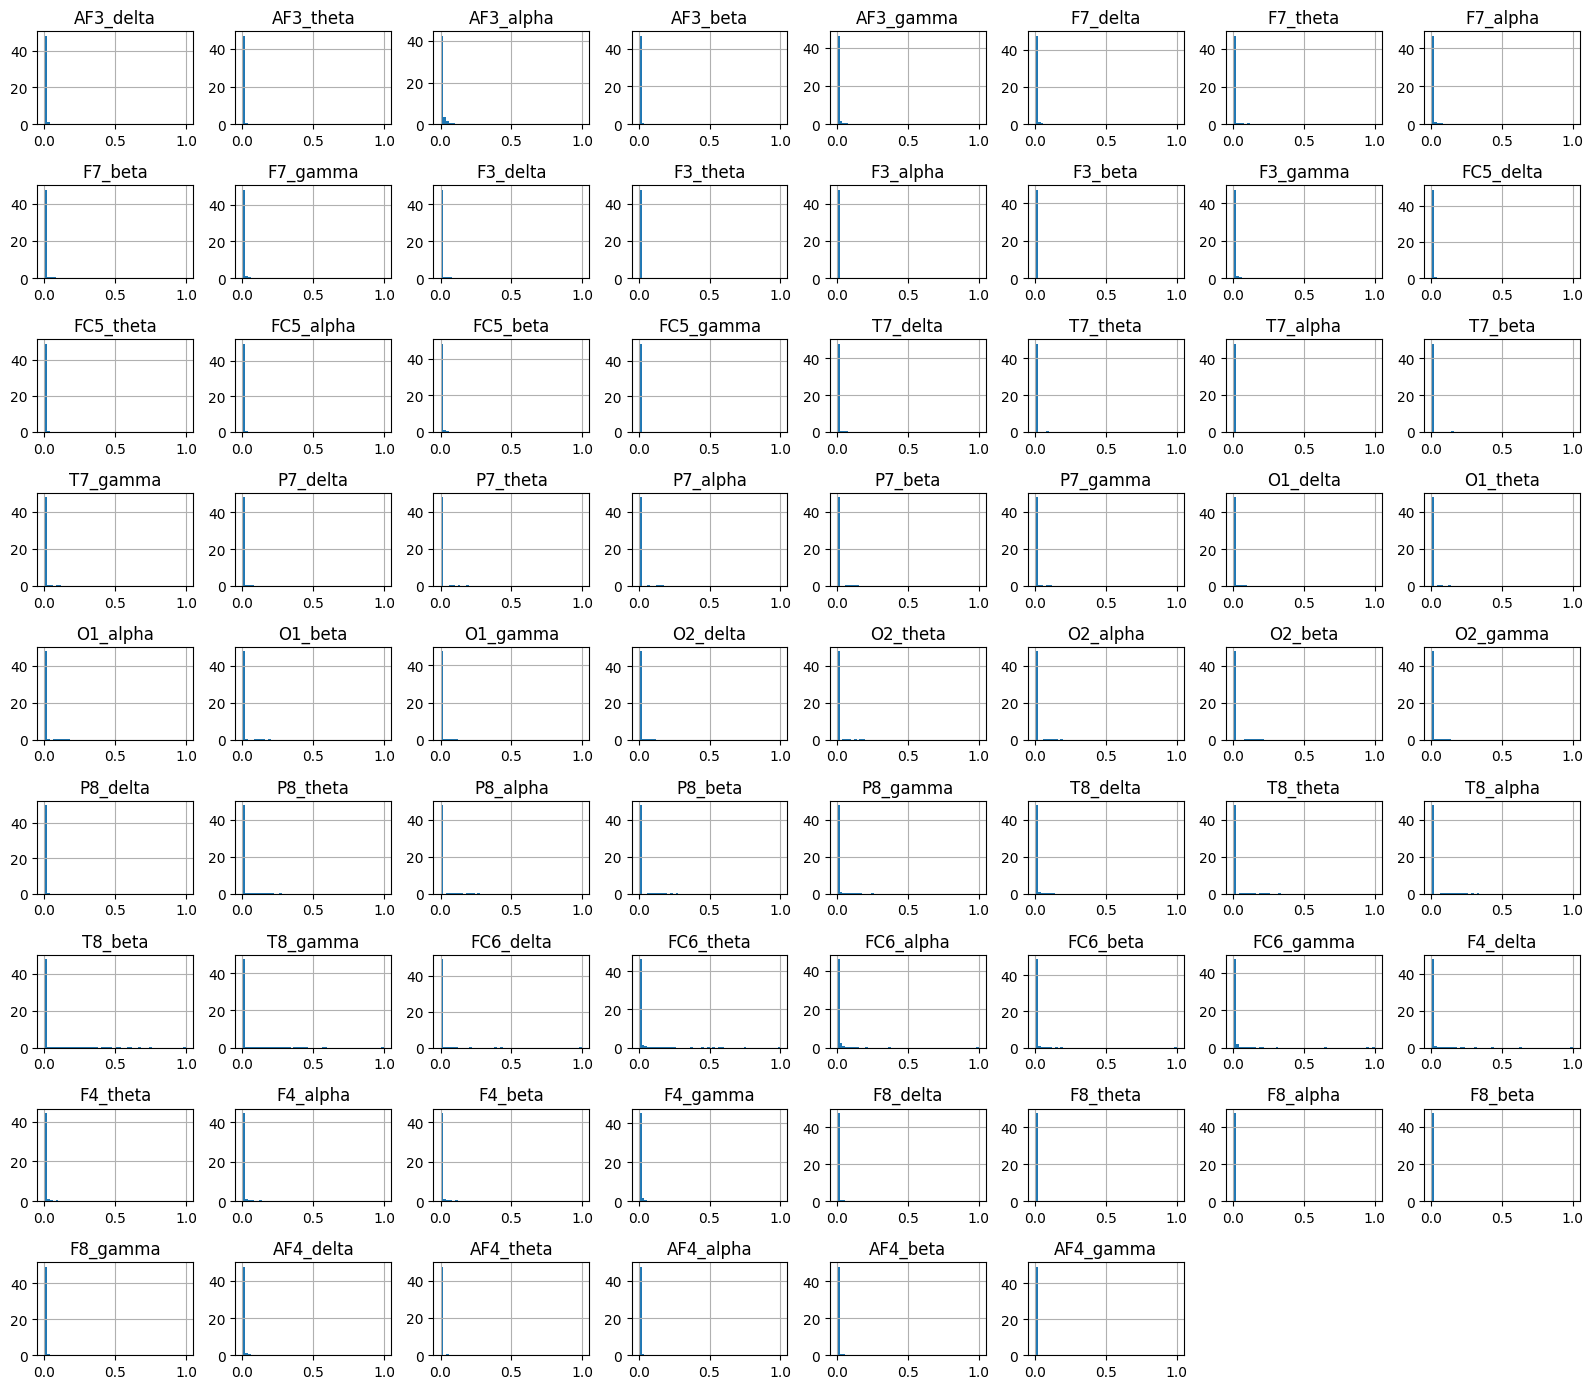

In [97]:
X_train_scaled_maxabs.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

In [86]:
print(df['AF3_gamma'].min(), df['AF3_gamma'].max())
print(X_train_scaled_maxabs['AF3_gamma'].min(), X_train_scaled_maxabs['AF3_gamma'].max())


4.1376404385061865e-14 5.550941136531158e-11
0.0007453944001092114 1.0


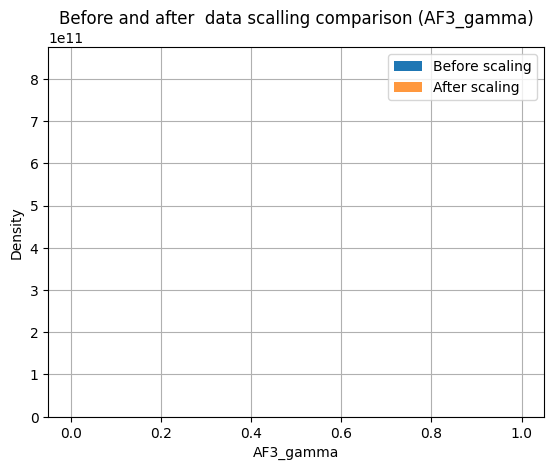

In [87]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_maxabs['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

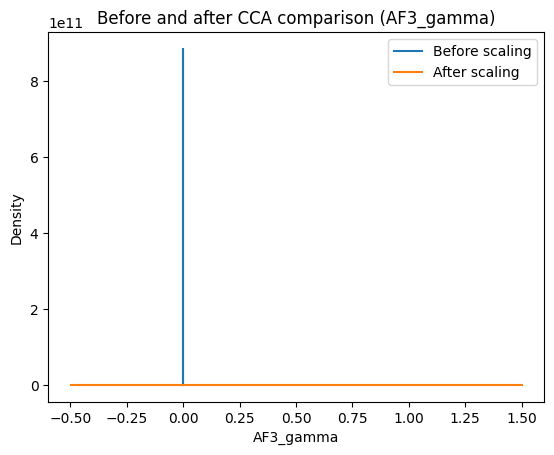

In [88]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_maxabs['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

**StandardScaler**

<Axes: ylabel='Density'>

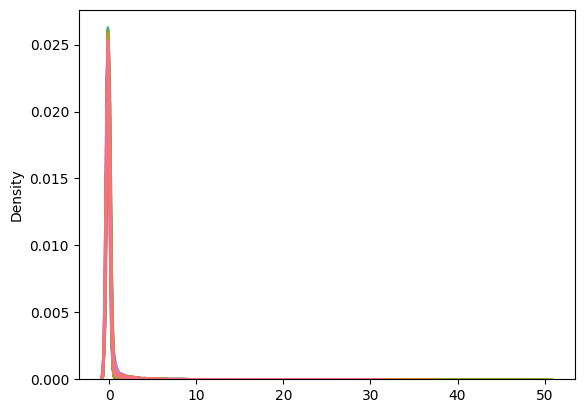

In [93]:
scaler_std = StandardScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_std = scaler_std.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=df.drop(["Class"],axis=1).columns)

# plot 
sns.kdeplot(X_train_scaled_std,legend=False)

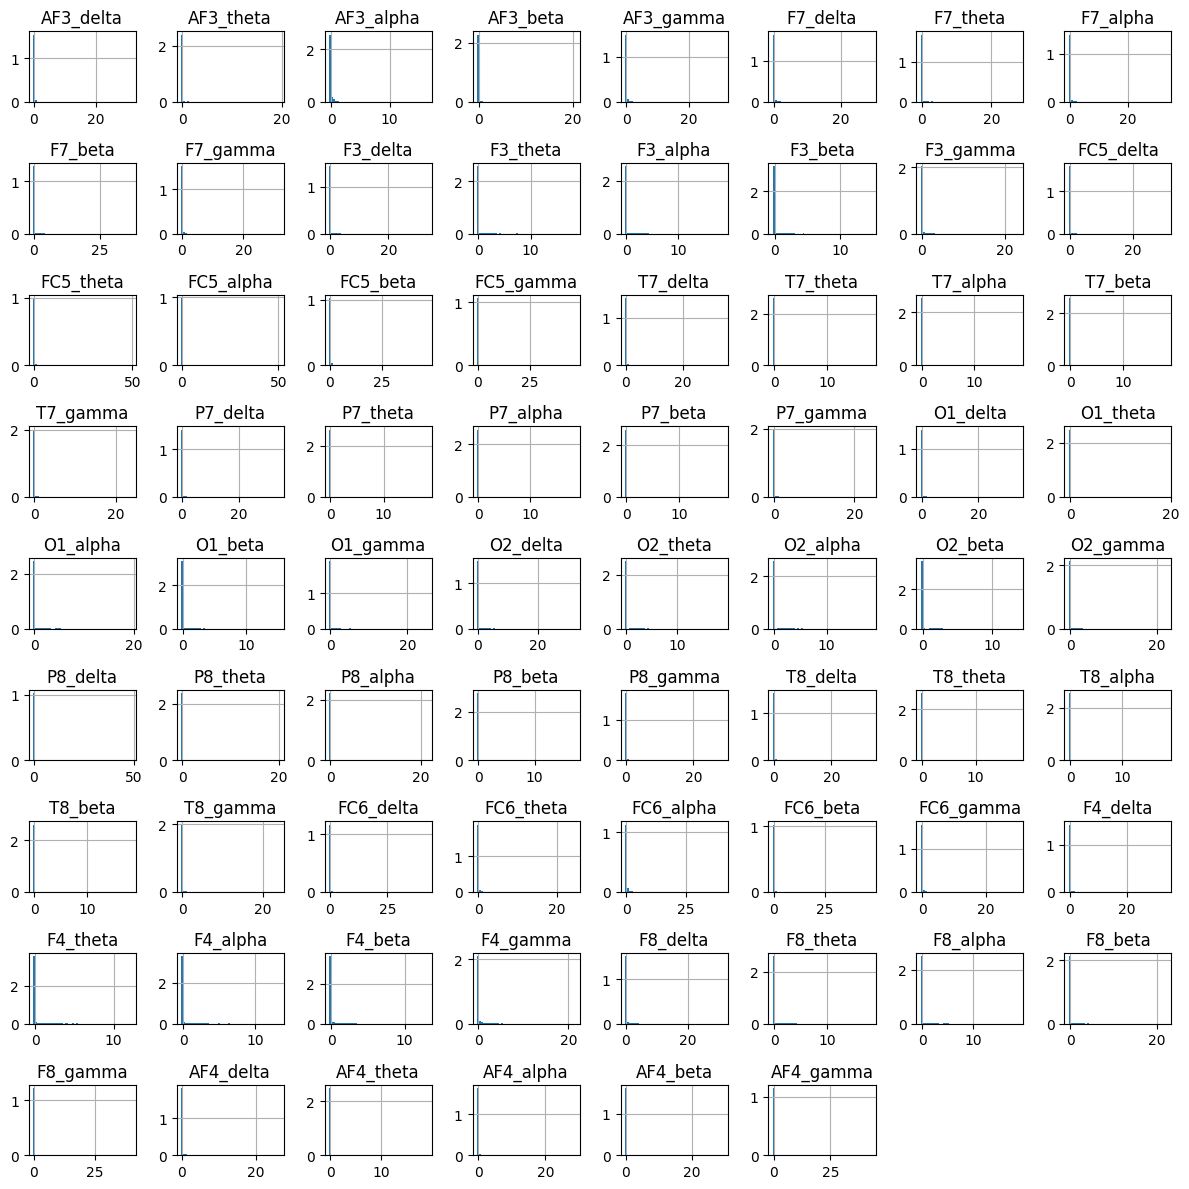

In [90]:
X_train_scaled_std.hist(bins=50, density=True, figsize=(12, 12))
plt.tight_layout()
plt.show()

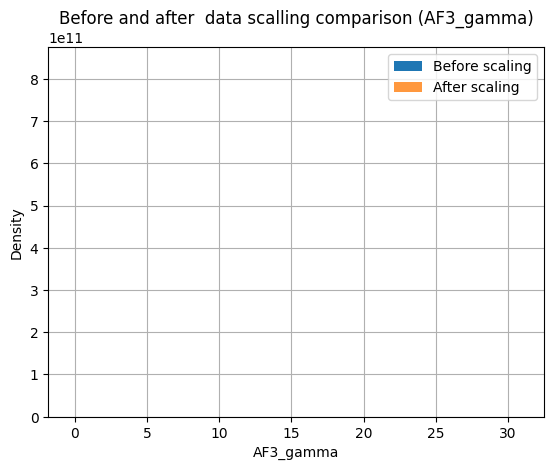

In [91]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_std['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

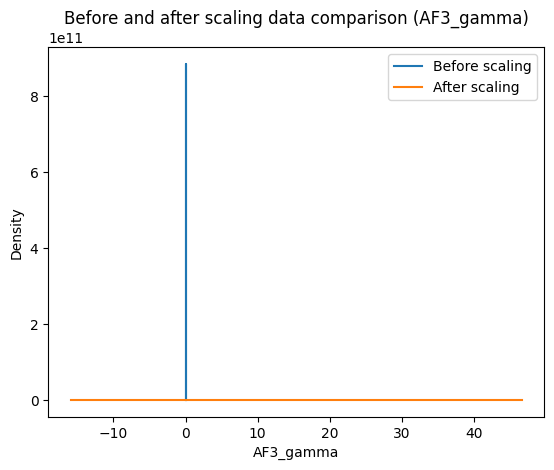

In [92]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_std['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after scaling data comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()